# Nouvelle section

In [59]:

import cmath
import numpy
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

ap=plt.imread("/apple--1.gif")
apy=plt.imread("/apple-ty.gif")
b14=plt.imread("/butterfly-14.gif")
b15=plt.imread("/butterfly-15.gif")
d1=plt.imread("/deer-1.gif")
d4=plt.imread("/deer-4.gif")
e1=plt.imread("/elephant-1.gif")
e4=plt.imread("/elephant-4.gif")
def sumT(img):
  m=0
  for i in range(256):
    for j in range(256):
      m=m+(img[i][j][0])
  return m

sp=np.sum(ap)
spy=np.sum(apy)


# **1)Moments géométriques:**

In [71]:
def MGT(im,p,q):
  m=0
  for x in range(im.shape[0]):
    for y in range(im.shape[1]):
      m=m+im[y][x][0]*(x**p)*(y**q)#il y a des images chaque pixel est une liste [0,0,0,0]
  return m/sumT(im)
def MG(im,p,q):
  m=0
  for x in range(im.shape[0]):
    for y in range(im.shape[1]):
      m=m+im[y][x]*(x**p)*(y**q)
  return m
#1
x=MG(ap,1,0)/sp
y=MG(ap,0,1)/sp
xt=MG(apy,1,0)/spy
yt=MG(apy,0,1)/spy
#2
xb=MGT(b14,1,0)
yb=MGT(b14,0,1)
xrb=MGT(b15,1,0)
yrb=MGT(b15,0,1)
#3
xd=MGT(d1,1,0)
yd=MGT(d1,0,1)
xrd=MGT(d4,1,0)
yrd=MGT(d4,0,1)
#4
xe=MGT(e1,1,0)
ye=MGT(e1,0,1)
xre=MGT(e4,1,0)
yre=MGT(e4,0,1)
l=[[x,y],[xt,yt],[xb,yb],[xrb,yrb],[xd,yd],[xrd,yrd],[xe,ye],[xre,yre]]

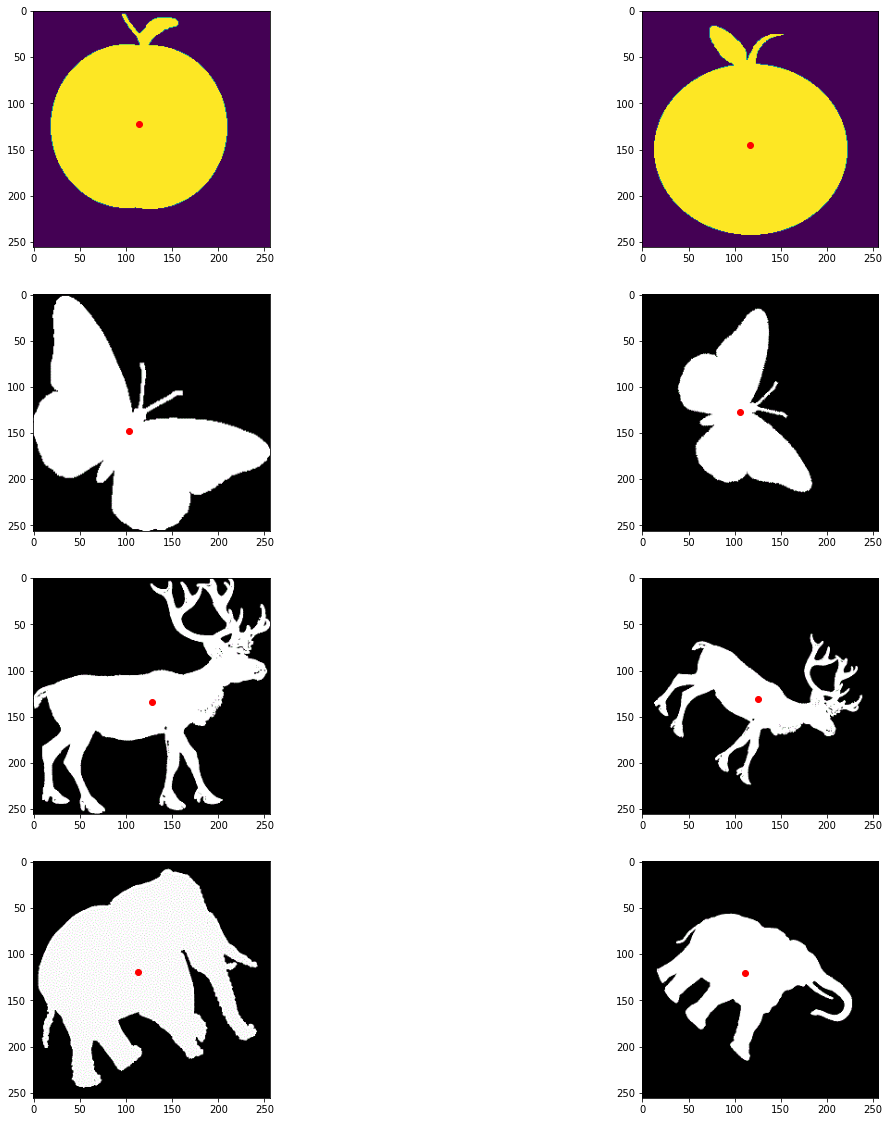

In [87]:
fig, axes=plt.subplots(4,2,figsize=(20,20))

ax=axes[0][0]
ax.imshow(ap)
ax.plot(x,y,"ro")
ax=axes[0][1]
ax.imshow(apy)
ax.plot(xt,yt,"ro")
ax=axes[1][0]
ax.imshow(b14)
ax.plot(xb,yb,"ro")
ax=axes[1][1]
ax.imshow(b15)
ax.plot(xrb,yrb,"ro")
ax=axes[2][0]
ax.imshow(d1)
ax.plot(xd,yd,"ro")
ax=axes[2][1]
ax.imshow(d4)
ax.plot(xrd,yrd,"ro")
ax=axes[3][0]
ax.imshow(e1)
ax.plot(xe,ye,"ro")
ax=axes[3][1]
ax.imshow(e4)
ax.plot(xre,yre,"ro")
plt.show()

# **2)Moments centrés:**

In [91]:
def Uijt(img,p,q,x1,y2):
  m1=0
  for x in range(256):#il y a des images chaque pixel est une liste [0,0,0,0]
    for y in range(256):
      m1=m1+img[y][x][0]*((x-x1)**p)*((y-y2)**q)
  
  return m1
def Uij(img,p,q,x1,y2):
  m1=0
  for x in range(256):
    for y in range(256):
      m1=m1+img[y][x]*((x-x1)**p)*((y-y2)**q)
  
  return m1



**3)Moments centrés et normalisés :**


In [90]:
def Nijt(img,p,q,x1,y2):#il y a des images chaque pixel est une liste [0,0,0,0]
  return Uijt(img,p,q,x1,y2)/(Uijt(img,0,0,x1,y2)**(((q+p)/2)+1))
def Nij(img,p,q,x1,y2):
  return Uij(img,p,q,x1,y2)/(Uij(img,0,0,x1,y2)**(((q+p)/2)+1))

**4) HU Moments (Moments de Hu):**

 

In [ ]:
h1=Nijt(img,2,0,x1,y2)+Nijt(img,0,2,x1,y2)
h2=(Nijt(img,2,0,x1,y2)-Nijt(img,0,2,x1,y2))**2+4*Nijt(img,1,1,x1,y2)**2
h3=(Nijt(img,3,0,x1,y2)-3*Nijt(img,1,2,x1,y2))**2+(3*Nijt(img,2,1,x1,y2)-Nijt(img,0,3,x1,y2))**2
h4=(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))**2+(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))**2
h5=(Nijt(img,3,0,x1,y2)-3*Nijt(img,1,2,x1,y2))*(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))*[(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))**2-3*(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))**2]+(3*Nijt(img,2,1,x1,y2)-Nijt(img,0,3,x1,y2))*(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))*[3*(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))**2-(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))**2])
h6=(Nijt(img,2,0,x1,y2)-Nijt(img,0,2,x1,y2))*[(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))**2-(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))**2]+4*Nijt(img,1,1,x1,y2)*(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))*(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))
h7=(3*Nijt(img,2,1,x1,y2)-Nijt(img,0,3,x1,y2))*(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))*[(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))**2-3*(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))**2]-(Nijt(img,3,0,x1,y2)-3*Nijt(img,1,2,x1,y2))*(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))*[3*(Nijt(img,3,0,x1,y2)+Nijt(img,1,2,x1,y2))**2-(Nijt(img,2,1,x1,y2)+Nijt(img,0,3,x1,y2))**2])